<a href="https://colab.research.google.com/github/bhuva-neswari-t/Enchanted-Wings-Marvels-Of-Butterfly-Species/blob/main/Butterfly_Classification_%7C%7C_CNN_%7C%7C_accuracy_86_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
phucthaiv02_butterfly_image_classification_path = kagglehub.dataset_download('phucthaiv02/butterfly-image-classification')

print('Data source import complete.')


100%|██████████| 226M/226M [00:02<00:00, 83.6MB/s]

Extracting files...


Data source import complete.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     butterfly  image classification   
  </span>
</div>


<div style="text-align:center; background-color:aqua">
  <img src="https://m.media-amazon.com/images/I/61qAJu32q6L._UF1000,1000_QL80_.jpg"></img>
</div>


<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     Import Python Libraries
  </span>
</div>


In [5]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     Load CSV containing train image labels
  </span>
</div>


In [11]:
# 1. Load CSV containing train image labels
df = pd.read_csv('/content/Training_set.csv')

<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
    printing csv file
  </span>
</div>


In [12]:
df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     path to image
  </span>
</div>


In [13]:
# 2. Path to images
train_dir = '/kaggle/input/butterfly-image-classification/train'
test_dir = '/kaggle/input/butterfly-image-classification/test'

<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     Create ImageDataGenerator with rescaling and augmentation
  </span>
</div>


In [14]:
# 3. Create ImageDataGenerator with rescaling and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # Split training into train+validation
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
     fill_mode='nearest'
)


<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     Flow from dataframe for training
  </span>
</div>


In [29]:
# 4. Flow from dataframe for training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory="/root/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2/train",
    x_col='filename',
    y_col='label',
    subset='training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory="/root/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2/train",
    x_col='filename',
    y_col='label',
    subset='validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


In [16]:
num_classes = len(train_generator.class_indices)


<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     Building CNN model
  </span>
</div>


In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),


    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),


    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),


    Flatten(),
    Dense(128, activation='relu'),
     Dense(512, activation='relu'),

    Dense(num_classes, activation='softmax')
])

<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     Model summary
  </span>
</div>


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 0)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371,584 (12.86 MB)

 Trainable params: 3,371,136 (12.86 MB)

 Non-trainable params: 448 (1.75 KB)

<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     compile the model
  </span>
</div>


<div style="text-align:center; background-color:aqua">
  <span style="font-size:30px; font-family: cursive; font-weight:bold; color:#FF5722;">
     Evaluation  model
  </span>
</div>


In [30]:
# Building CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),

    Dense(num_classes, activation='softmax') # Use the corrected num_classes
])

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Train the model
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=30
)

Epoch 1/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.0939 - loss: 4.1223 - val_accuracy: 0.0148 - val_loss: 8.3309
Epoch 2/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.1562 - loss: 3.8571 - val_accuracy: 0.0125 - val_loss: 8.6293
Epoch 3/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.2245 - loss: 3.0616 - val_accuracy: 0.0547 - val_loss: 5.5589
Epoch 4/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.3438 - loss: 2.2359 - val_accuracy: 0.0469 - val_loss: 5.7130
Epoch 5/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.3235 - loss: 2.5513 - val_accuracy: 0.1727 - val_loss: 3.3235
Epoch 6/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.3125 - loss: 2.5558 - val_accuracy: 0.1828 - val_loss: 3.2672
Epoch 7/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.3983 - loss: 2.1874 - val_accuracy: 0.3664 - val_loss: 2.5152
Epoch 8/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.4062 - loss: 2.0131 - 

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


162/162 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.5797 - loss: 1.4566 - val_accuracy: 0.4641 - val_loss: 2.0561
Epoch 16/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.4688 - loss: 1.9141 - val_accuracy: 0.4758 - val_loss: 2.0277
Epoch 17/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.6121 - loss: 1.2837 - val_accuracy: 0.5266 - val_loss: 1.8384
Epoch 18/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.6250 - loss: 1.1885 - val_accuracy: 0.5391 - val_loss: 1.8310
Epoch 19/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.6380 - loss: 1.1769 - val_accuracy: 0.5289 - val_loss: 1.7745
Epoch 20/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.6875 - loss: 1.2660 - val_accuracy: 0.5312 - val_loss: 1.7825
Epoch 21/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.6759 - loss: 1.0812 - val_accuracy: 0.5773 - val_loss: 1.5958
Epoch 22/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.5938 - loss: 1.2888 - val_

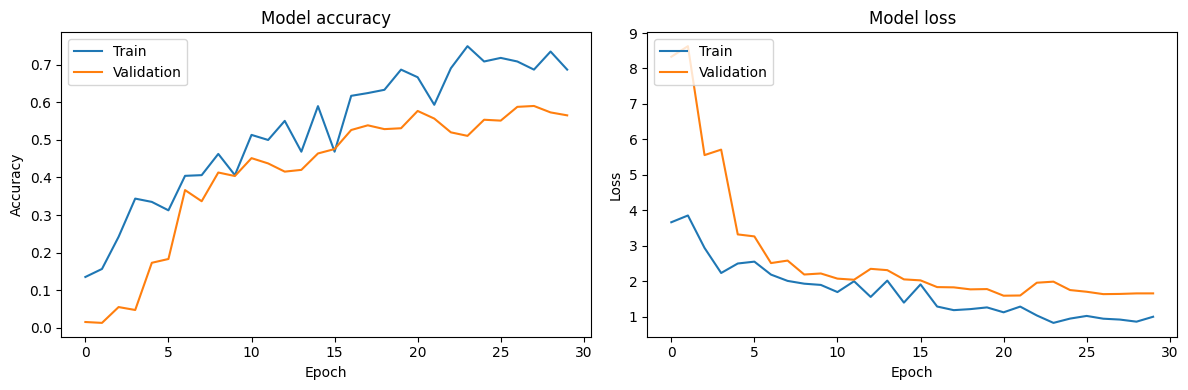

In [33]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


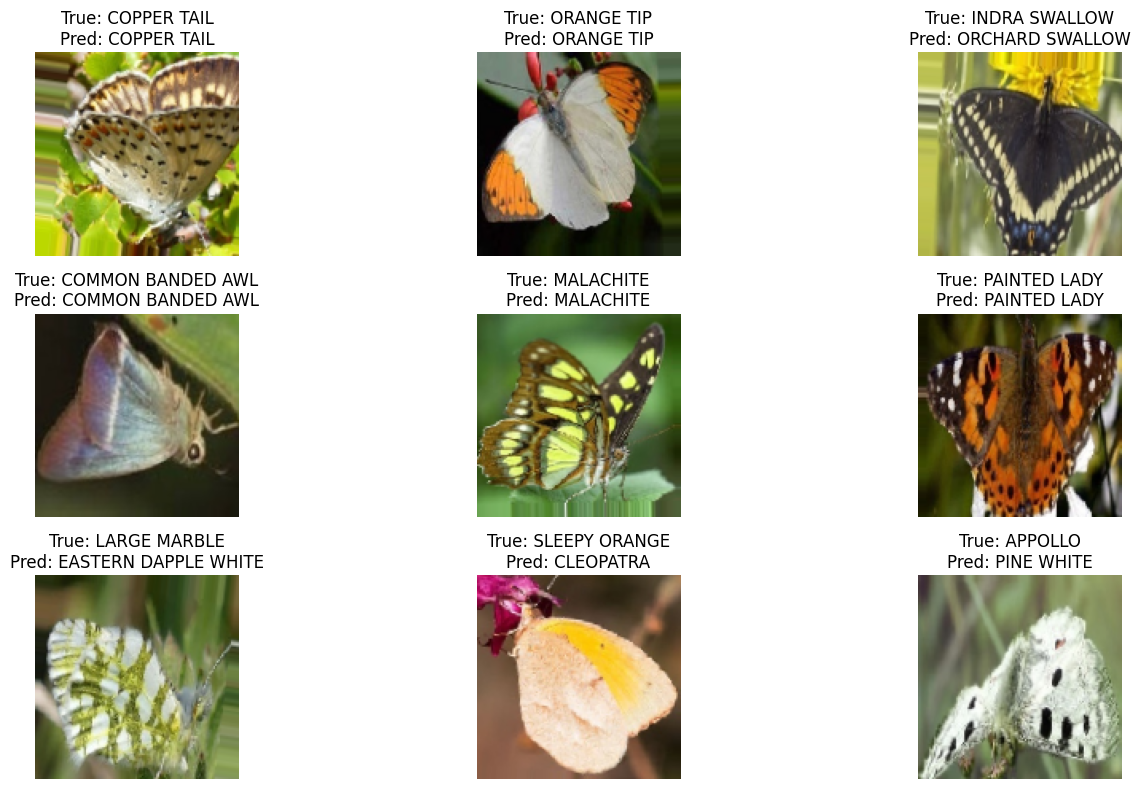

In [34]:
val_images, val_labels = next(val_generator)

pred_labels = model.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(val_images, true_labels, pred_labels, class_names, num_images=9)